   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

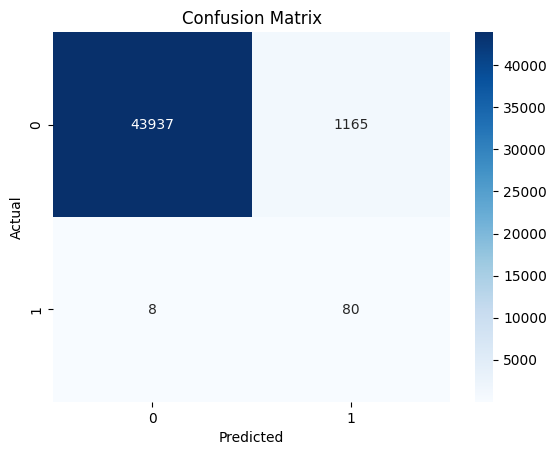

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     45102
         1.0       0.06      0.91      0.12        88

    accuracy                           0.97     45190
   macro avg       0.53      0.94      0.55     45190
weighted avg       1.00      0.97      0.99     45190

Precision: 0.06
Recall: 0.91
F1-Score: 0.12
Random Forest Model Performance:


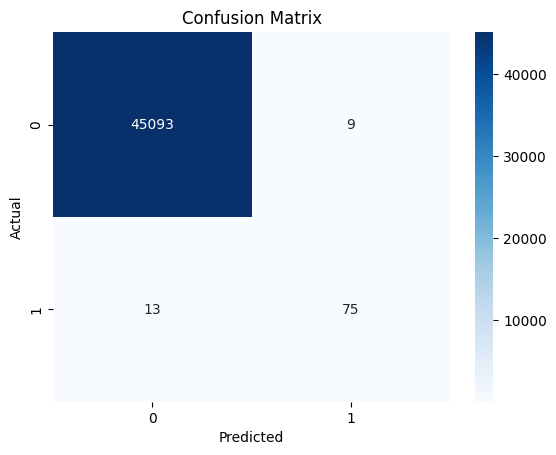

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45102
         1.0       0.89      0.85      0.87        88

    accuracy                           1.00     45190
   macro avg       0.95      0.93      0.94     45190
weighted avg       1.00      1.00      1.00     45190

Precision: 0.89
Recall: 0.85
F1-Score: 0.87


In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/creditcard.csv')

# Explore the dataset
print(df.head())
print(df.info())
print(df['Class'].value_counts())

# Check for missing values
print(df.isnull().sum())

# Handle missing values if any (e.g., by dropping or filling them)
df = df.dropna()

# Feature scaling
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Re-arrange columns
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Define features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle class imbalance using SMOTE (oversampling)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Train a Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

# Train a Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluate the models
def evaluate_model(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print(classification_report(y_test, y_pred))
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')

print("Logistic Regression Model Performance:")
evaluate_model(y_test, y_pred_logreg)

print("Random Forest Model Performance:")
evaluate_model(y_test, y_pred_rf)
